<a href="https://colab.research.google.com/github/prometricas/Abeba_Mineria/blob/main/Actividad_Miner%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Prefiero subir el archivo manualmente en Colab para no depender de rutas fijas.
from google.colab import files
uploaded = files.upload()

Saving Bank Customer Churn Prediction.csv to Bank Customer Churn Prediction.csv


# **1. Obtención y preparación de datos**

## **1.1. Carga de base de datos**

In [2]:
# Identifico el nombre del archivo subido y lo leo con pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(list(uploaded.keys())[0])

# Me aseguro de ver la forma inicial y un vistazo rápido
print("Dimensiones iniciales::", df.shape)
display(df.head())

# 2.3 Reviso información general y tipos de datos
print("\n Info del DataFrame")
df.info()

Dimensiones iniciales:: (10000, 12)


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



 Info del DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


## **1.2. Limipieza de datos**
* Identificación de datos faltantes y duplicados
* Etiquetado de variables categóricas

In [3]:
# Ajusto visualización
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (8,4)
sns.set(style="whitegrid")

# Reviso valores faltantes
print("\nValores faltantes por columna:")
print(df.isna().sum())

# Reviso duplicados y, si hay, los elimino
dup_count = df.duplicated().sum()
print("\nDuplicados totales:", dup_count)
if dup_count > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print("Dimensiones después de eliminar duplicados:", df.shape)

# Identifico variable dependiente "churn" creando  tabla de frecuencias
churn_counts = df['churn'].value_counts().rename('Frecuencia')
churn_percentages = df['churn'].value_counts(normalize=True).mul(100).round(2).rename('Porcentaje')
churn_table = pd.concat([churn_counts, churn_percentages], axis=1)              # Combino conteo y porcentaje en una sola tabla
print("\nTabla de frecuencias para la variable objetivo ('churn'):")            # Muestro la tabla
display(churn_table)

# Identifico variables categóricas y numéricas para preparar codificación
print("\nCATEGORIZACIÓN Y ETIQUETADO DE VARIABLES")
cat_cols = ['country', 'gender', 'credit_card', 'active_member']
num_cols = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
print("Categóricas:", cat_cols)
print("Numéricas:  ", num_cols)

# Reemplazo los valores numéricos por etiquetas descriptivas en las variables categóricas
df['churn'] = df['churn'].replace({1: 'Perdido', 0: 'Retenido'})
df['credit_card'] = df['credit_card'].replace({1: 'Sí', 0: 'No'})
df['active_member'] = df['active_member'].replace({1: 'Sí', 0: 'No'})
#df['products_number'] = df['products_number'].astype(str) # Convierto a string para tratarla como categórica




Valores faltantes por columna:
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Duplicados totales: 0

Tabla de frecuencias para la variable objetivo ('churn'):


,Frecuencia,Porcentaje
churn,,
0,7963,79.63
1,2037,20.37



CATEGORIZACIÓN Y ETIQUETADO DE VARIABLES
Categóricas: ['country', 'gender', 'credit_card', 'active_member']
Numéricas:   ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']


# **2. Análisis exploratorio**

## **2.1. Variables categóricas**

### Frecuencias relativas

In [4]:
for c in cat_cols:
  #frecuencias = pd.crosstab(df[c], df['churn'], margins=True, margins_name='Total')
  #frecuencias.columns = [f"churn_{c}" if c!='Total' else 'Total' for c in abs_freq.columns]
  Porcentajes = pd.crosstab(df[c], df['churn'], margins=True, margins_name='Total', normalize='index').round(2)
  print(f"\nChurn versus {c}:")
  display(Porcentajes)




Churn versus country:


churn,Perdido,Retenido
country,,
France,0.16,0.84
Germany,0.32,0.68
Spain,0.17,0.83
Total,0.20,0.80



Churn versus gender:


churn,Perdido,Retenido
gender,,
Female,0.25,0.75
Male,0.16,0.84
Total,0.20,0.80



Churn versus credit_card:


churn,Perdido,Retenido
credit_card,,
No,0.21,0.79
Sí,0.20,0.80
Total,0.20,0.80



Churn versus active_member:


churn,Perdido,Retenido
active_member,,
No,0.27,0.73
Sí,0.14,0.86
Total,0.20,0.80


### Frecuencias categóricas

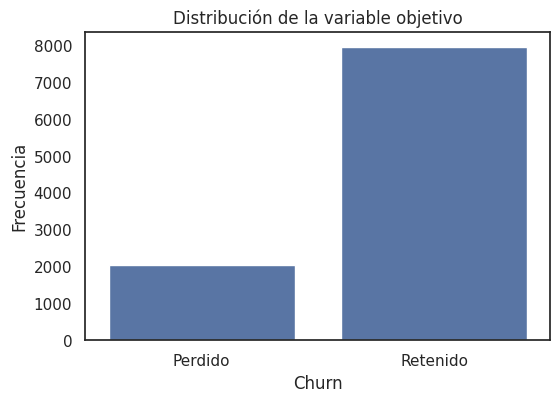

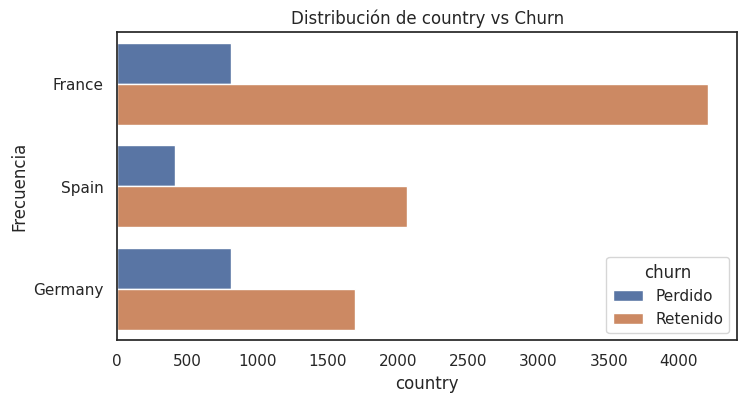

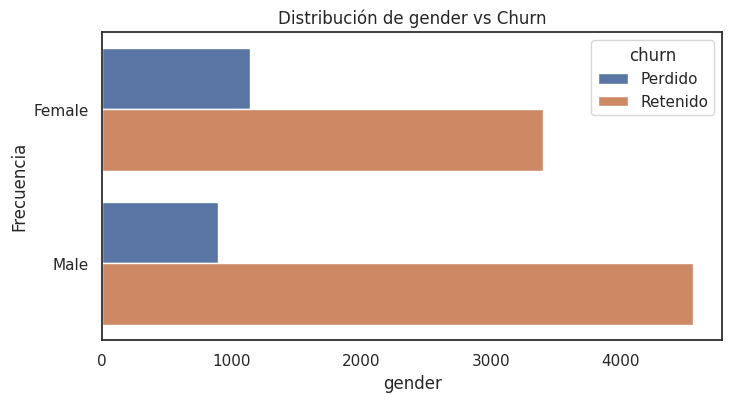

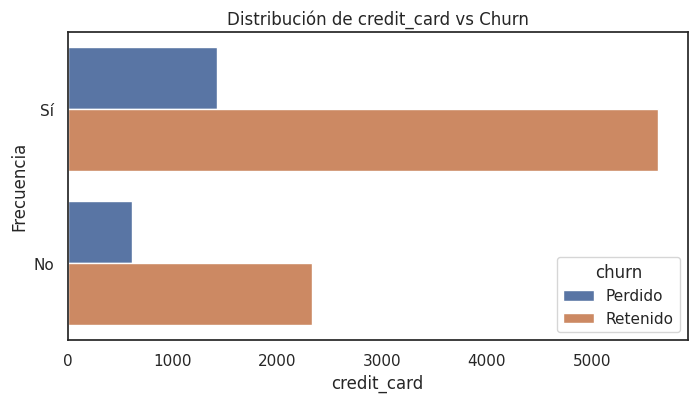

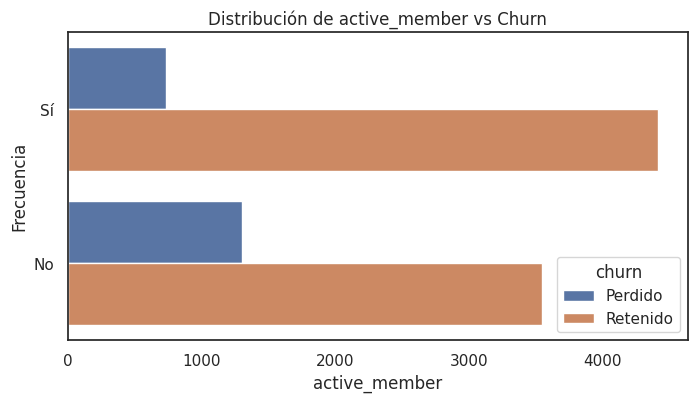

In [8]:
# Estilo visual
sns.set(style="white")

# Visualización de la variable objetivo 'churn'
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df)
plt.title('Distribución de la variable objetivo')
plt.xlabel('Churn')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de la distribución de categóricas versus Churn
for categoria in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=categoria, hue='churn', data=df)
    plt.title(f'Distribución de {categoria} vs Churn')
    plt.xlabel(categoria)
    plt.ylabel('Frecuencia')
    plt.show()

## **2.2. Variables numéricas**

### Densidad de frecuencia

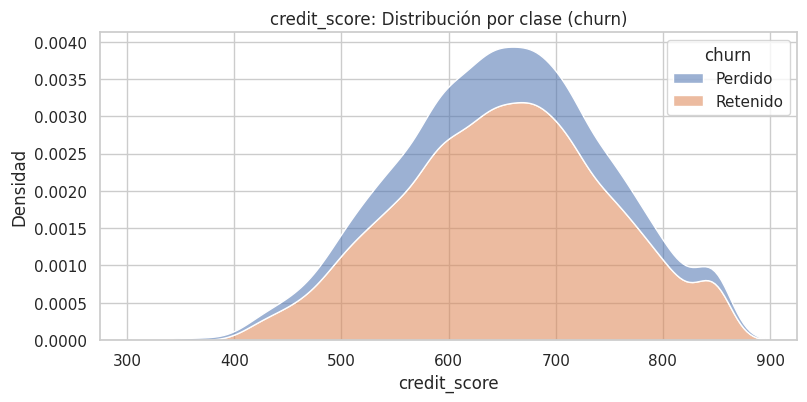

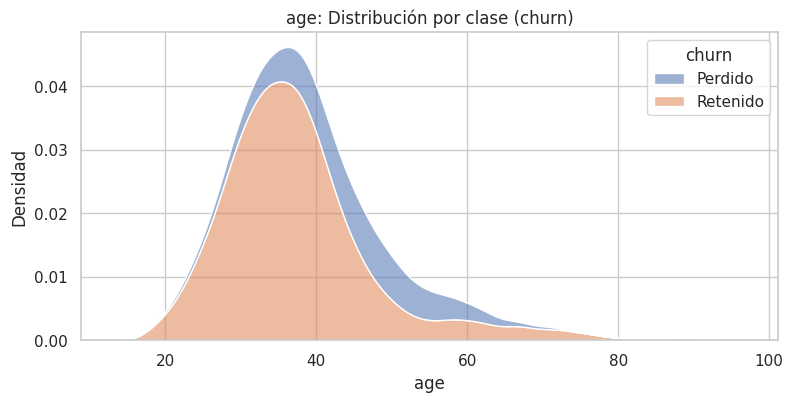

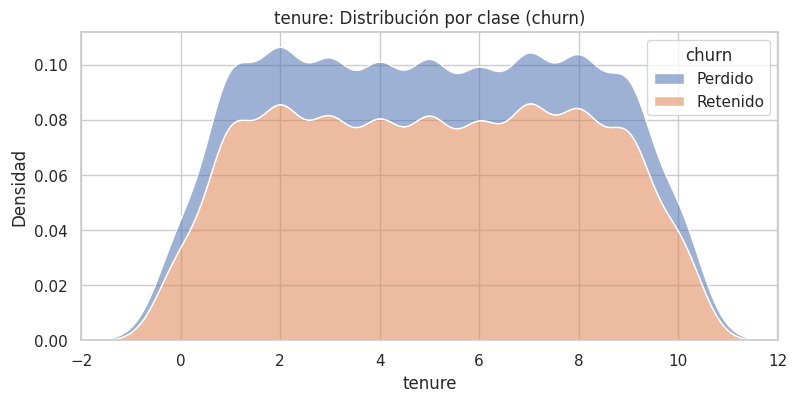

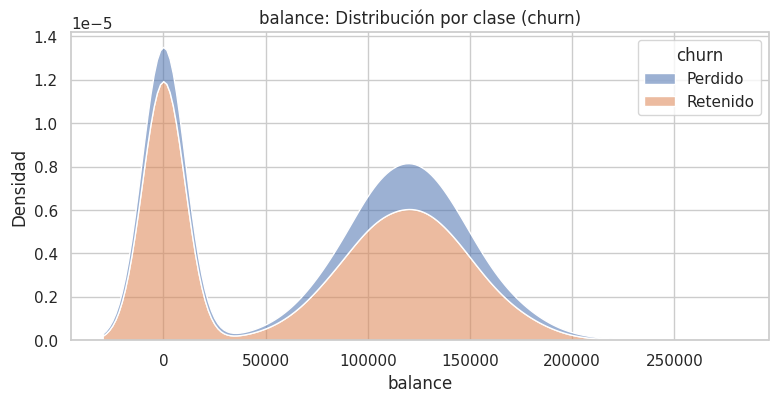

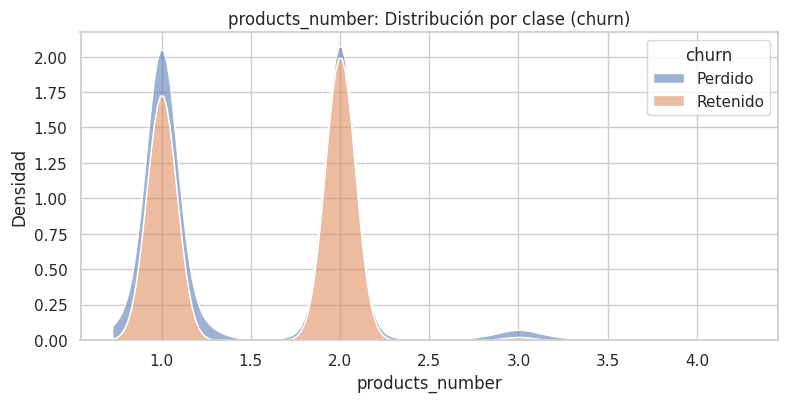

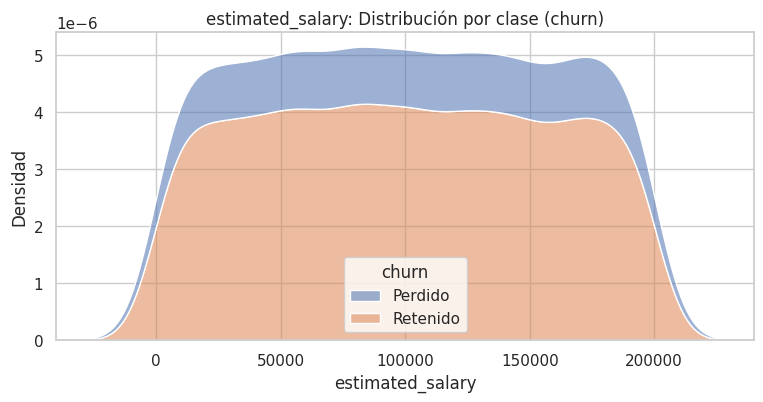

In [9]:
# Estilo visual
sns.set(style="whitegrid")

# Generar gráficas de densidad
for numeric in num_cols:
  plt.figure(figsize=(9, 4))
  sns.kdeplot(data=df, x=numeric, hue="churn", multiple="stack", alpha=0.55)
  plt.title(f"{numeric}: Distribución por clase (churn)")
  plt.xlabel(numeric)
  plt.ylabel("Densidad")
  plt.show()

### Gráficas de dispersión

<Figure size 900x400 with 0 Axes>

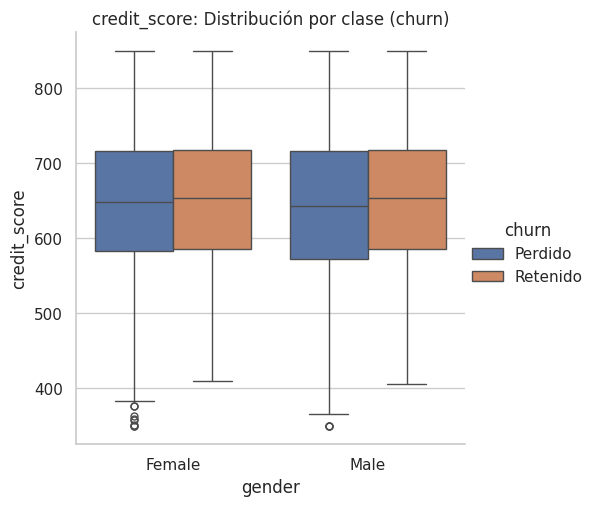

<Figure size 900x400 with 0 Axes>

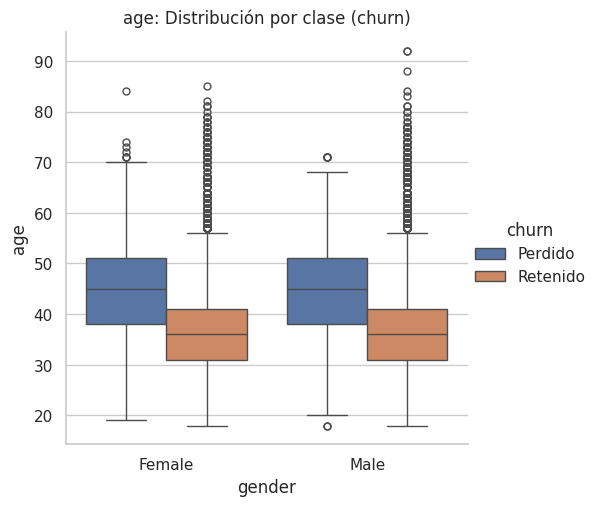

<Figure size 900x400 with 0 Axes>

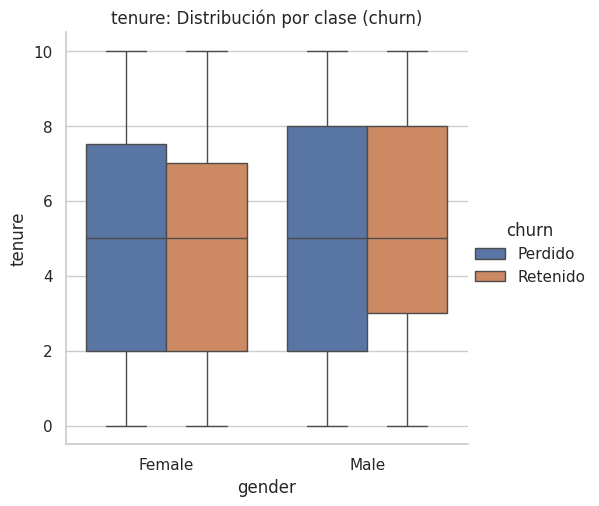

<Figure size 900x400 with 0 Axes>

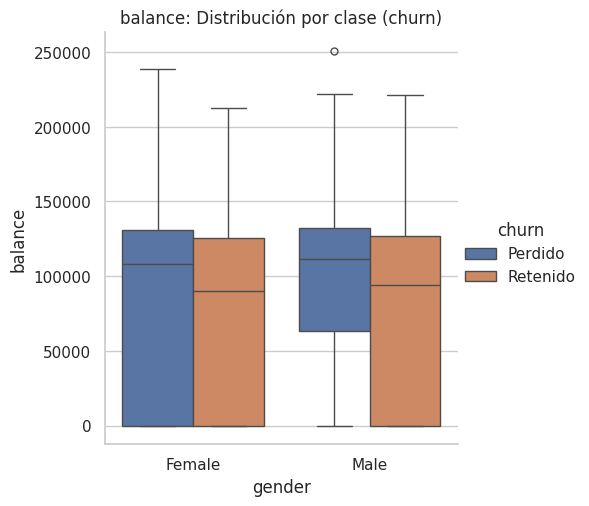

<Figure size 900x400 with 0 Axes>

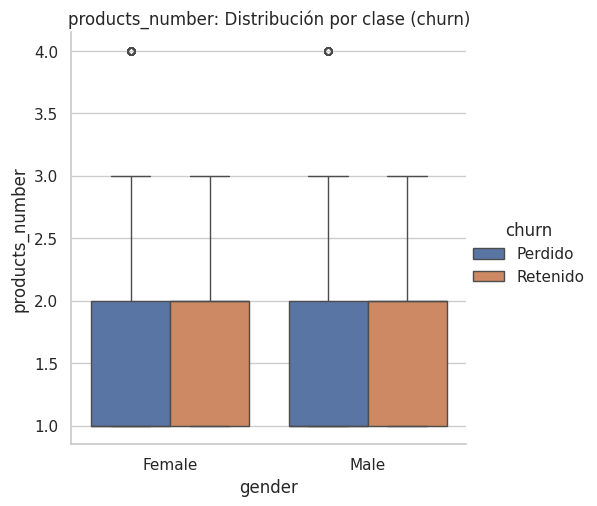

<Figure size 900x400 with 0 Axes>

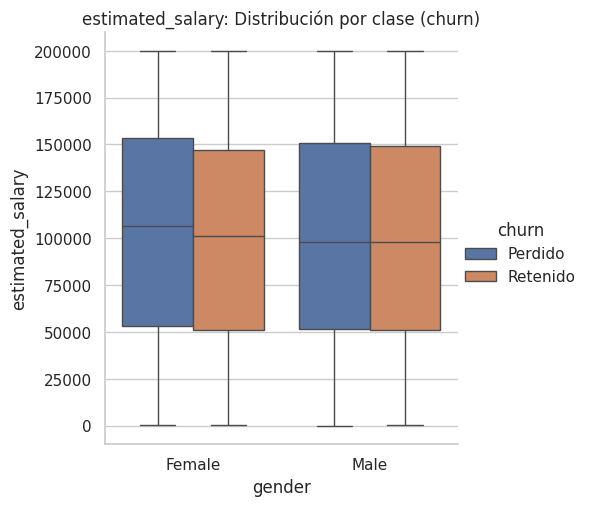

In [10]:
# Ciclo para gráficas de dispersión
for numeric in num_cols:
  plt.figure(figsize=(9, 4))
  sns.catplot(data=df, x='gender', y=numeric, hue='churn', kind="box")
  plt.title(f"{numeric}: Distribución por clase (churn)")
  plt.show()


# **4. Modelado**

Clasificación de churn con: Regresión Logística, Árbol, Random Forest, MLP + Segmentación con K-Means (sin usar la etiqueta)

El método *OneHot* es una herramienta de la librería Scikit-learn que transforma variables categóricas en un formato numérico adecuado para modelos de Machine Learning

In [ ]:
# Cargo librerías típicas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, confusion_matrix, classification_report

# Defino variable objetivo como binaria
df['Churn'] = (df['churn']=='Perdido').astype(int)

# Separo conjuntos de predictores y variable objetivo
X = df[cat_cols + num_cols].copy()
y = df['Churn'].copy()

# Partición estratificada de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2025, stratify=y
)

# Preprocesamiento simple:
# OneHot para categóricas y Escalado para numéricas (necesito para Logística y MLP)
prepro = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='drop'
)

# Ajusto con train y transformo train/test
X_train_pp = prepro.fit_transform(X_train)
X_test_pp  = prepro.transform(X_test)

# Para referencia, guardo el número de 'features' finales
n_features_final = X_train_pp.shape[1]
print(f"Features finales tras preprocesamiento: {n_features_final}")



Features finales tras preprocesamiento: 15


## **Estimación de modelos**

In [ ]:
# ---------------------------------------------------------
# MODELO 1: Regresión Logística (binaria)
# Empiezo por un modelo lineal como baseline
logit = LogisticRegression(max_iter=1000, n_jobs=None, class_weight='balanced')
logit.fit(X_train_pp, y_train)

y_pred_logit = logit.predict(X_test_pp)
y_proba_logit = logit.predict_proba(X_test_pp)[:, 1]

acc_logit = accuracy_score(y_test, y_pred_logit)
prec_logit, rec_logit, f1_logit, _ = precision_recall_fscore_support(y_test, y_pred_logit, average='binary', zero_division=0)
auc_logit = roc_auc_score(y_test, y_proba_logit)

print("\n[Regresión Logística]")
print(f"Accuracy: {acc_logit:.3f} | Precision: {prec_logit:.3f} | Recall: {rec_logit:.3f} | F1: {f1_logit:.3f} | AUC: {auc_logit:.3f}")
print(confusion_matrix(y_test, y_pred_logit))


# ---------------------------------------------------------
# MODELO 2: Árbol de Decisión (clasificador)
# Para el árbol, puedo usar las features ya preprocesadas
tree = DecisionTreeClassifier(max_depth=None, random_state=2025, class_weight='balanced')
tree.fit(X_train_pp, y_train)

y_pred_tree = tree.predict(X_test_pp)
y_proba_tree = tree.predict_proba(X_test_pp)[:, 1]

acc_tree = accuracy_score(y_test, y_pred_tree)
prec_tree, rec_tree, f1_tree, _ = precision_recall_fscore_support(y_test, y_pred_tree, average='binary', zero_division=0)
auc_tree = roc_auc_score(y_test, y_proba_tree)

print("\n[Árbol de Decisión]")
print(f"Accuracy: {acc_tree:.3f} | Precision: {prec_tree:.3f} | Recall: {rec_tree:.3f} | F1: {f1_tree:.3f} | AUC: {auc_tree:.3f}")
print(confusion_matrix(y_test, y_pred_tree))

# ---------------------------------------------------------
# MODELO 3: Random Forest, ensamble de árboles
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=2025,
    n_jobs=-1,
    class_weight='balanced_subsample'
)
rf.fit(X_train_pp, y_train)

y_pred_rf = rf.predict(X_test_pp)
y_proba_rf = rf.predict_proba(X_test_pp)[:, 1]

acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf, rec_rf, f1_rf, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='binary', zero_division=0)
auc_rf = roc_auc_score(y_test, y_proba_rf)

print("\n[Random Forest]")
print(f"Accuracy: {acc_rf:.3f} | Precision: {prec_rf:.3f} | Recall: {rec_rf:.3f} | F1: {f1_rf:.3f} | AUC: {auc_rf:.3f}")
print(confusion_matrix(y_test, y_pred_rf))


# ---------------------------------------------------------
# MODELO 4: Red Neuronal básica (MLPClassifier)
# Aquí no me complico: una red chiquita, con paciencia para converger
mlp = MLPClassifier(
    hidden_layer_sizes=(32,16),
    activation='relu',
    solver='adam',
    alpha=1e-4,
    max_iter=1000,          # bastantes iteraciones
    early_stopping=True,    # detención temprana si no mejora en validación
    n_iter_no_change=10,    # paciencia
    validation_fraction=0.1,
    random_state=2025
)
mlp.fit(X_train_pp, y_train)

y_pred_mlp = mlp.predict(X_test_pp)
# En MLP puedo obtener decision_function o predict_proba; uso proba para AUC
y_proba_mlp = mlp.predict_proba(X_test_pp)[:, 1]

acc_mlp = accuracy_score(y_test, y_pred_mlp)
prec_mlp, rec_mlp, f1_mlp, _ = precision_recall_fscore_support(y_test, y_pred_mlp, average='binary', zero_division=0)
auc_mlp = roc_auc_score(y_test, y_proba_mlp)

print("\n[MLP (Red Neuronal básica)]")
print(f"Accuracy: {acc_mlp:.3f} | Precision: {prec_mlp:.3f} | Recall: {rec_mlp:.3f} | F1: {f1_mlp:.3f} | AUC: {auc_mlp:.3f}")
print(confusion_matrix(y_test, y_pred_mlp))

# ---------------------------------------------------------
# CLÚSTERES: K-Means (no supervisado)
# Para clustering uso TODO X (train+test) preprocesado (me sirve para entender perfiles)
X_full_pp = prepro.transform(X)  # reutilizo el preprocesador ya ajustado
k = 2  # yo pruebo con 2 segmentos como punto de partida
kmeans = KMeans(n_clusters=k, random_state=2025, n_init=10)
clusters = kmeans.fit_predict(X_full_pp)

# Agrego los clusters al DataFrame original para inspección
data_clusters = df.copy()
data_clusters['cluster_k2'] = clusters

# Calculo tasa de churn por clúster (esto me ayuda a interpretar segmentos con mayor riesgo)
tasa_por_cluster = data_clusters.groupby('cluster_k2')['Churn'].mean().to_frame('churn_mean').sort_values('churn_mean', ascending=False)
conteo_por_cluster = data_clusters['cluster_k2'].value_counts().sort_index().to_frame('conteo')

print("\n[K-Means: resumen por clúster]")
display(pd.concat([conteo_por_cluster, tasa_por_cluster], axis=1))

# ---------------------------------------------------------
# 4.8 Guardo todas las métricas en una tabla
metricas_modelos = pd.DataFrame({
    'modelo': ['LogisticRegression','DecisionTree','RandomForest','MLP'],
    'accuracy': [acc_logit, acc_tree, acc_rf, acc_mlp],
    'precision': [prec_logit, prec_tree, prec_rf, prec_mlp],
    'recall': [rec_logit, rec_tree, rec_rf, rec_mlp],
    'f1': [f1_logit, f1_tree, f1_rf, f1_mlp],
    'auc': [auc_logit, auc_tree, auc_rf, auc_mlp]
}).sort_values('auc', ascending=False).reset_index(drop=True)

print("\n[Métricas resumidas por modelo]")
display(metricas_modelos)



[Regresión Logística]
Accuracy: 0.703 | Precision: 0.375 | Recall: 0.688 | F1: 0.485 | AUC: 0.770
[[1126  467]
 [ 127  280]]

[Árbol de Decisión]
Accuracy: 0.804 | Precision: 0.520 | Recall: 0.516 | F1: 0.518 | AUC: 0.697
[[1399  194]
 [ 197  210]]

[Random Forest]
Accuracy: 0.865 | Precision: 0.780 | Recall: 0.469 | F1: 0.586 | AUC: 0.845
[[1539   54]
 [ 216  191]]

[MLP (Red Neuronal básica)]
Accuracy: 0.863 | Precision: 0.765 | Recall: 0.472 | F1: 0.584 | AUC: 0.859
[[1534   59]
 [ 215  192]]

[K-Means: resumen por clúster]


,conteo,churn_mean
cluster_k2,,
0,5942,0.224672
1,4058,0.172992



[Métricas resumidas por modelo]


,modelo,accuracy,precision,recall,f1,auc
0,MLP,0.8630,0.764940,0.471744,0.583587,0.858882
1,RandomForest,0.8650,0.779592,0.469287,0.585890,0.844998
2,LogisticRegression,0.7030,0.374833,0.687961,0.485269,0.769782
3,DecisionTree,0.8045,0.519802,0.515971,0.517879,0.697094


## **Interpretación**

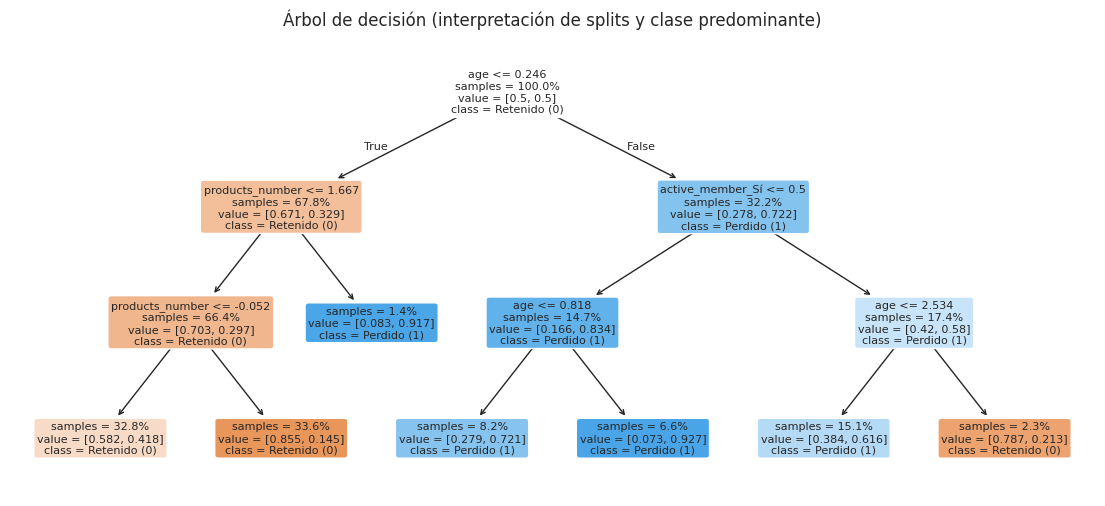

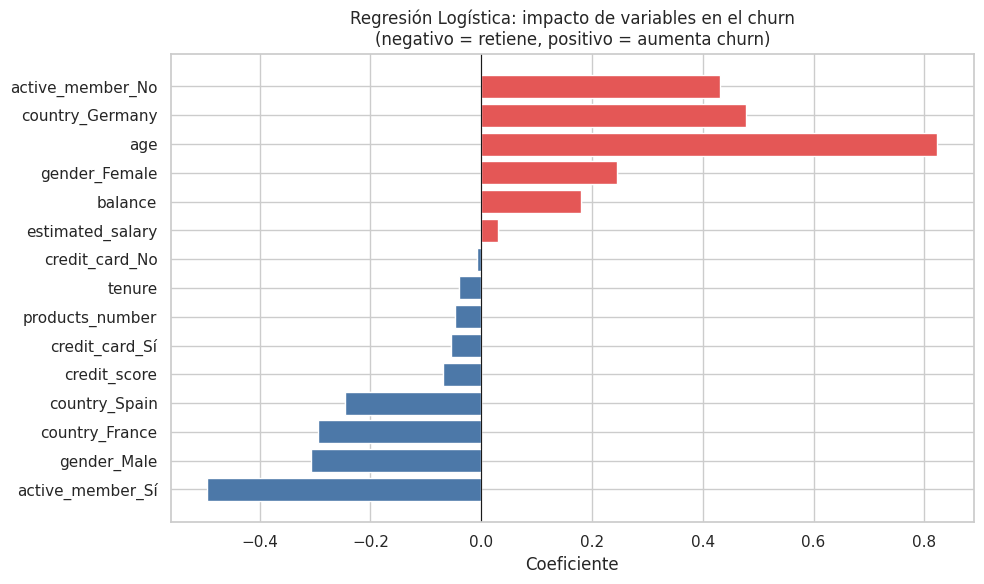


Tasa de churn por cluster (k=2):
            churn_mean
cluster_k2            
1             0.224672
0             0.172992

Cruce rápido cluster vs churn (conteos):
Churn          0     1
cluster_k2            
0           3356   702
1           4607  1335

Variables numéricas con mayor diferencia de medias entre clusters (top 10):


cluster_k2,0,1,gap
balance,9343.558048,122339.739872,112996.181824
estimated_salary,99141.434473,100738.212339,1596.777867
credit_score,649.216363,651.425109,2.208747
products_number,1.857812,1.306462,0.551349
age,38.667324,39.095591,0.428267
tenure,5.076885,4.969034,0.107851


In [ ]:
# ============================================
# Interpretabilidad del Churn: Árbol claro + Coeficientes + Clusters (k=2)
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

# Yo parto de que ya existen: df (o df_prep), cat_col, num_col y la etiqueta 'churn'
base = df.copy()
base['Churn'] = base['Churn'].astype(int)


# Preprocesamiento simple (one-hot + escala) y nombres de variables expandidas
prepro = ColumnTransformer(
    [('num', StandardScaler(), num_cols),
     ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
    remainder='drop'
)
X_pp = prepro.fit_transform(X)

feat_names = prepro.get_feature_names_out()
feat_names = [f.replace('num__','').replace('cat__','') for f in feat_names]  # los limpio para leer mejor

# --------------------------------------------------------------------
# (1) ÁRBOL DE DECISIÓN PEQUEÑO Y CLARO (solo para interpretar splits)
# --------------------------------------------------------------------
# Yo entreno un árbol superficial para que se lea fácil (profundidad baja).
tree_interp = DecisionTreeClassifier(
    max_depth=3,               # poco profundo = más interpretable
    min_samples_leaf=100,      # hojas con tamaño decente
    class_weight='balanced',
    random_state=42
)
tree_interp.fit(X_pp, y)

plt.figure(figsize=(14,6))
plot_tree(
    tree_interp,
    feature_names=feat_names,
    class_names=['Retenido (0)','Perdido (1)'],
    filled=True,
    rounded=True,
    impurity=False,
    proportion=True,
    fontsize=8
)
plt.title("Árbol de decisión (interpretación de splits y clase predominante)")
plt.show()

# --------------------------------------------------------------------
# (2) COEFICIENTES DE REGRESIÓN LOGÍSTICA (qué sube/baja el churn)
# --------------------------------------------------------------------
# Yo ajusto una logística sencilla sobre el mismo X_pp para leer coeficientes.
logit = LogisticRegression(max_iter=1000, class_weight='balanced')
logit.fit(X_pp, y)
coefs = pd.DataFrame({'feature': feat_names, 'coef': logit.coef_.ravel()})
coefs['abs'] = coefs['coef'].abs()
top = pd.concat([coefs.sort_values('coef').head(12),  # más negativos (retención)
                 coefs.sort_values('coef', ascending=False).head(12)])  # más positivos (riesgo)

plt.figure(figsize=(10,6))
colors = ['#4c78a8' if v<0 else '#e45756' for v in top['coef']]
plt.barh(top['feature'], top['coef'], color=colors)
plt.axvline(0, color='k', linewidth=0.8)
plt.title("Regresión Logística: impacto de variables en el churn\n(negativo = retiene, positivo = aumenta churn)")
plt.xlabel("Coeficiente")
plt.tight_layout()
plt.show()

# --------------------------------------------------------------------
# (3) CLUSTERS K=2 Y SU RELACIÓN CON CHURN (vista muy simple)
# --------------------------------------------------------------------
# Yo creo dos grupos en el espacio de features y miro la tasa de churn por cluster.
k2 = KMeans(n_clusters=2, random_state=42, n_init=10)
cl2 = k2.fit_predict(X_pp)

aux = base.copy()
aux['cluster_k2'] = cl2
print("\nTasa de churn por cluster (k=2):")
print(aux.groupby('cluster_k2')['Churn'].mean().to_frame('churn_mean').sort_values('churn_mean', ascending=False))

print("\nCruce rápido cluster vs churn (conteos):")
print(pd.crosstab(aux['cluster_k2'], aux['Churn']))

# (Opcional breve) muestro cuáles variables numéricas promedio separan más los clusters
if len(num_cols) > 0:
    diff = aux.groupby('cluster_k2')[num_cols].mean().T
    diff['gap'] = (diff.max(axis=1) - diff.min(axis=1))
    print("\nVariables numéricas con mayor diferencia de medias entre clusters (top 10):")
    display(diff.sort_values('gap', ascending=False).head(10))
